# Traitement d'image par python
## Introduction

Python est également un langage assez fournit pour faire du traiement d'image. Poiyr cela, il nous suffit juste d'utiliser les bibliothèques suivantes :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

On peut importer les images sous forme de matrices, et les afficher grâce à matplotlib

In [2]:
image_lena = plt.imread('./images/lena512color.tiff') 
print(image_lena)
np.shape(image_lena)


[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


(512, 512, 3)

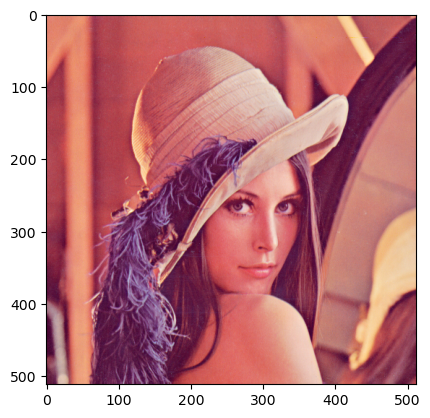

In [3]:
plt.imshow(image_lena)

## Création d'image

Le fait que les images soient sous forme de matrice nous permet également d'en créer.

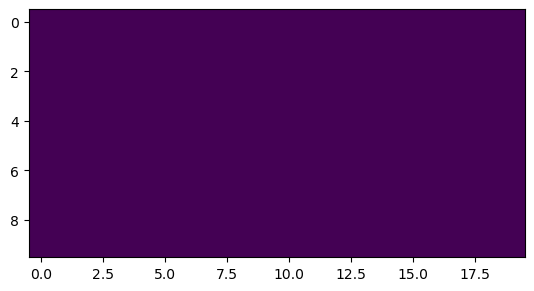

In [4]:
A = np.zeros( (10,20), dtype = np.uint8)

C = np.array([
    [1,2],
    [3,4],
    [5,6]
], dtype= np.Uint64)

plt.imshow(A)



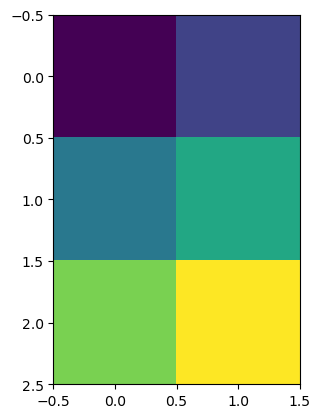

In [5]:
plt.imshow(C)

On peut également faire des drapeaux. Notez ici l'utlisation du rgb, donnant alors des matrices en 3 dimensions.

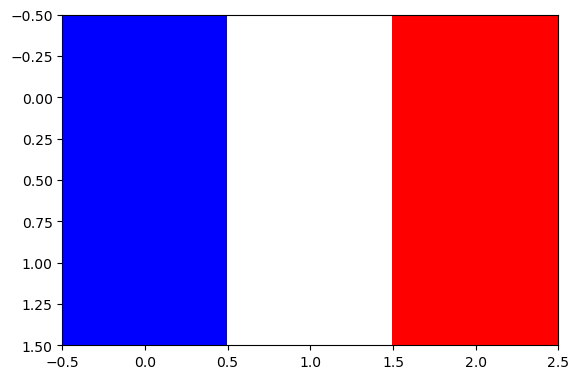

In [6]:
red = [255, 0, 0]
white = [255, 255, 255]
blue = [0,0, 255]

france_flag = np.array([[blue, white, red], [blue, white, red]])

plt.imshow(france_flag)

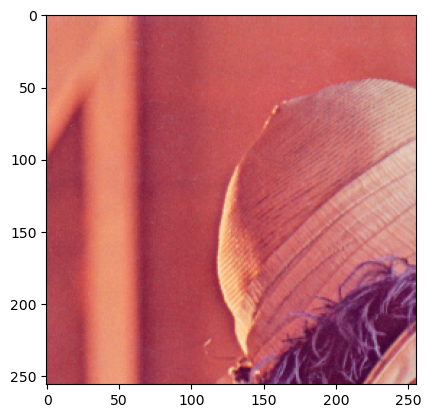

In [7]:
def quadrant(image, i, j):

    x, y, _  = np.shape(image)
    x /= 2
    y /= 2

    return image[int(x) * (i-1):int(x) * i, int(y) * (j-1):int(y) * j]

plt.imshow(quadrant(image_lena,1,1))

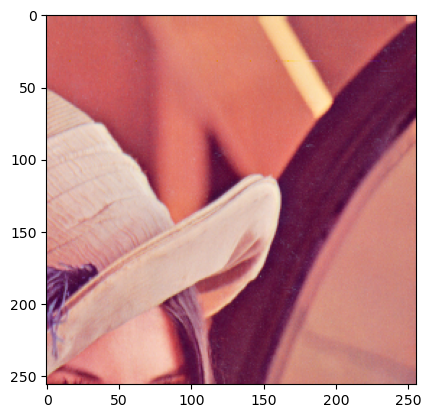

In [8]:
plt.imshow(quadrant(image_lena,1,2))

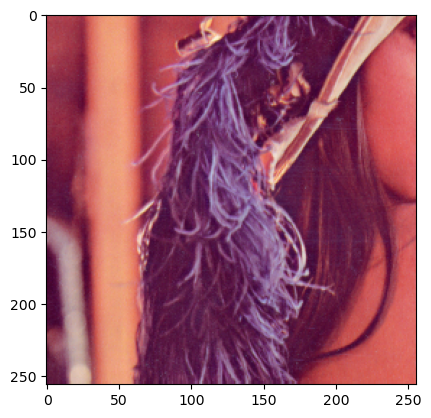

In [9]:
plt.imshow(quadrant(image_lena, 2, 1))

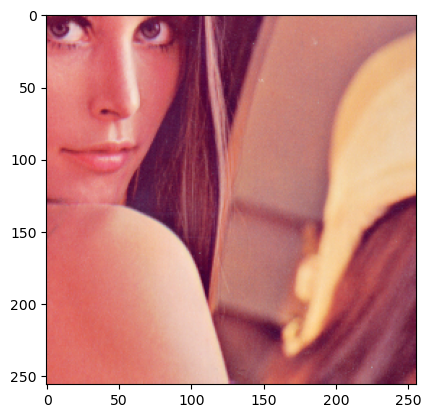

In [10]:
plt.imshow(quadrant(image_lena, 2, 2))

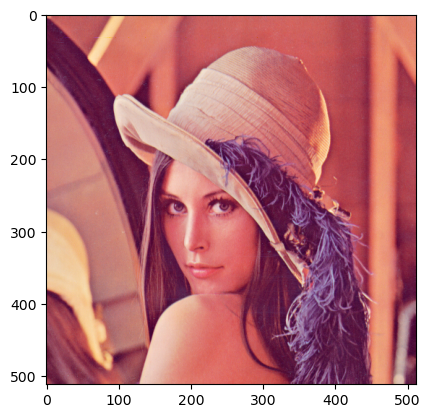

In [11]:
def symetrie(image):

    return np.fliplr(image)

plt.imshow(symetrie(image_lena))

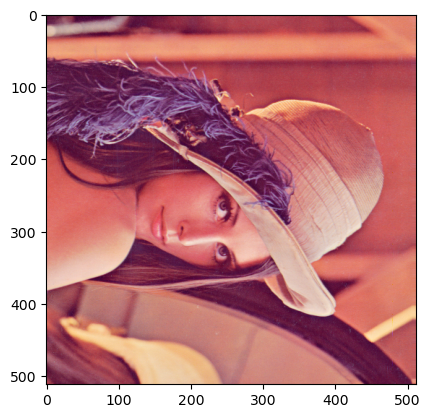

In [12]:
def rotation(image):
    return np.rot90(image,3)

plt.imshow(rotation(image_lena))

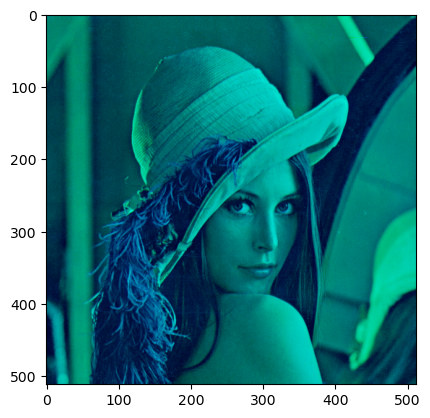

In [13]:
def composante(image, k):

    x,y,z = np.shape(image)

    new_image = np.copy(image)

    for i in range(x):
        for j in range(y):

            new_image[i,j,k-1] = 0
    
    return new_image

plt.imshow(composante(image_lena, 1))


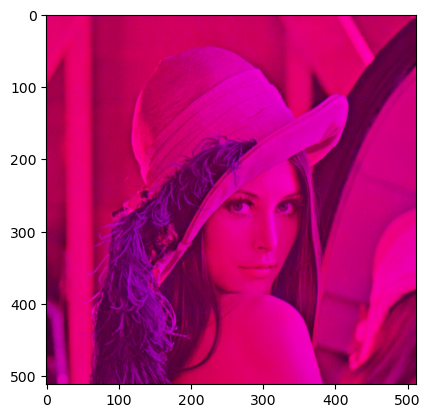

In [14]:
plt.imshow(composante(image_lena,2))

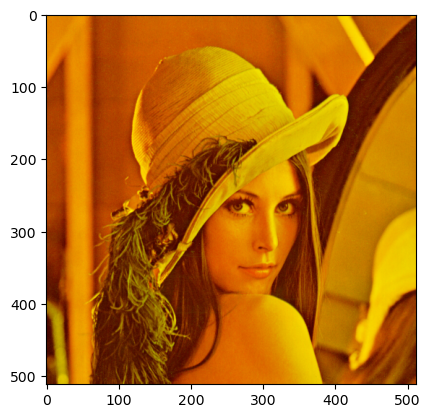

In [15]:
plt.imshow(composante(image_lena,3))

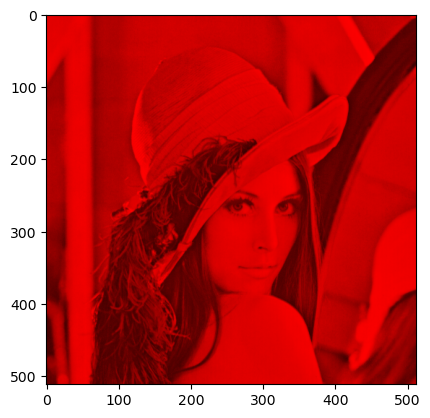

In [16]:

def primaire(image, k):

    x,y,z = np.shape(image)

    new_image = np.copy(image)

    for i in range(x):
        for j in range(y):

            if k == 1:
                new_image[i,j,1], new_image[i,j,2] = 0,0
            
            elif k == 2:
                new_image[i,j,0], new_image[i,j,2] = 0, 0
            
            elif k == 3:
                new_image[i,j,0], new_image[i,j,1] = 0,0
    
 

    return new_image

plt.imshow(primaire(image_lena,1))


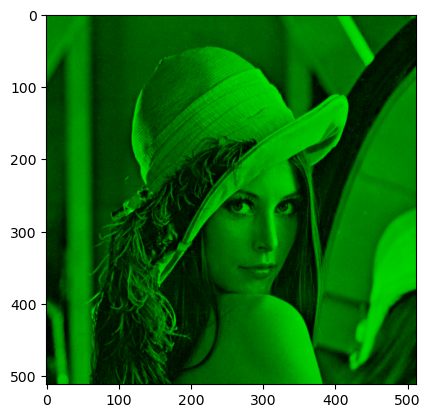

In [17]:
plt.imshow(primaire(image_lena,2))

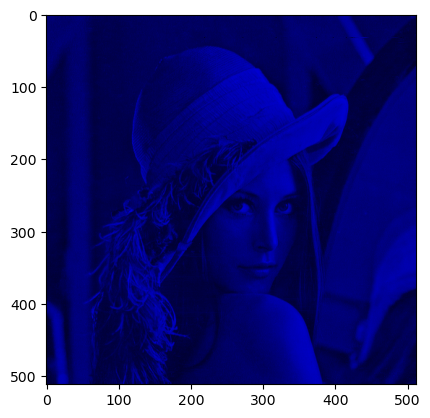

In [18]:
plt.imshow(primaire(image_lena,3))

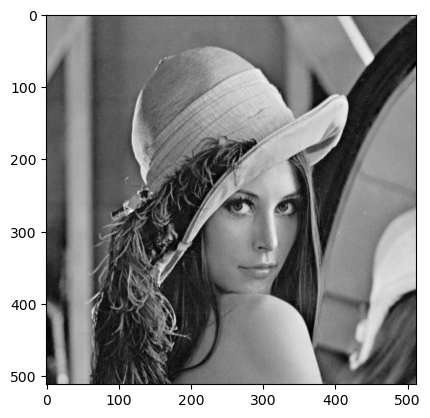

In [19]:
def to_grey(image):

    # Dimension de l'image
    x, y, _ = np.shape(image)

    # Nouvelle matrice de la taille de l'image (créée avec des 0)
    grey_pic = np.zeros(np.shape(image)[:2])

    # Conversion en gris
    for i in range(x):
        for j in range(y):
            grey_pic[i,j] = int(image[i,j,0] * 299/1000) +\
                            int(image[i,j,1] * 587/1000) +\
                            int(image[i,j,2] * 144/1000)

    return grey_pic

plt.imshow(to_grey(image_lena), cmap="gray")

La complexité de ces opération est assez faible car il s'agit tout simplement d'additions et de produits.

## Transformation avancées

### Pixellisation



array([[[225, 134, 120],
        [224, 132, 113],
        [222, 130, 108],
        ...,
        [194,  93,  95],
        [195,  94,  94],
        [191,  90,  93]],

       [[225, 130, 108],
        [226, 130, 106],
        [224, 128, 105],
        ...,
        [198,  94,  92],
        [201,  97,  95],
        [148,  59,  78]],

       [[225, 129, 108],
        [227, 132, 107],
        [225, 130, 109],
        ...,
        [205, 100,  99],
        [144,  57,  78],
        [ 88,  22,  64]],

       ...,

       [[143,  66,  85],
        [166, 117, 129],
        [195, 165, 157],
        ...,
        [136,  54,  78],
        [154,  79, 101],
        [134,  60,  85]],

       [[122,  53,  79],
        [156, 105, 122],
        [191, 162, 156],
        ...,
        [150,  72,  92],
        [153,  83, 104],
        [120,  47,  73]],

       [[100,  33,  66],
        [137,  80, 105],
        [207, 178, 168],
        ...,
        [163,  94, 111],
        [137,  67,  89],
        [108,  34,  65]]

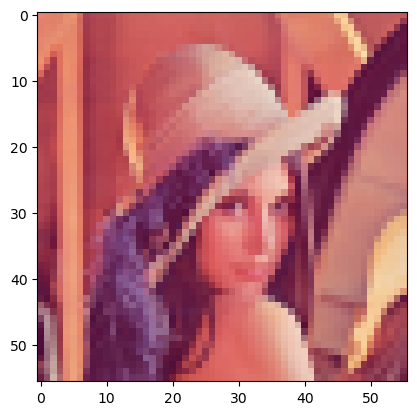

In [55]:
def pixellise(img,p):
    x_dim, y_dim = img.shape[1], img.shape[0]
    new_xdim, new_ydim = x_dim // p, y_dim // p
    # on détruit les pixels qui dépassent
    new_img = np.zeros((new_ydim, new_xdim,3), dtype=np.uint32)
    for i in range(new_ydim):
        for j in range(new_xdim):
            new_img[i,j] = [int(np.mean( img[i*p:(i+1)*p, j*p:(j+1)*p, k] )) for k in range(3) ]
    
    plt.imshow(new_img, interpolation='nearest')
    return new_img

pixellise(image_lena,9)


### Lissage (ou floutage)

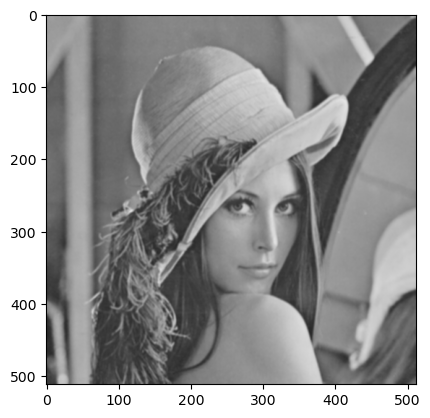

In [21]:
def lissage(image):

    new_image = np.copy(image)

    x, y, _ = np.shape(image)

    a1,a2,b1,b2 = 0,0,0,0 # sélecteur pour les slices

    for i in range(x):

        if i == 0:
            a1, a2 = 0,2
        
        elif i == x-1:
            a1, a2 = x-2,x
        
        else:
            a1, a2 = i-1, i+2

        
        for j in range(y):
            if j == 0:
                b1, b2 = 0,2
        
            elif j == x-1:
                b1, b2 = y-2,y
        
            else:
                b1, b2 = j-1, j+2


            new_image[i,j] = np.mean(image[a1:a2, b1:b2])


    return new_image

plt.imshow(lissage(image_lena))

array([[  0.,   0.,   0., ...,   0., 255.,   0.],
       [  0.,   0.,   0., ...,   0., 255.,   0.],
       [  0.,   0.,   0., ...,   0., 255.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

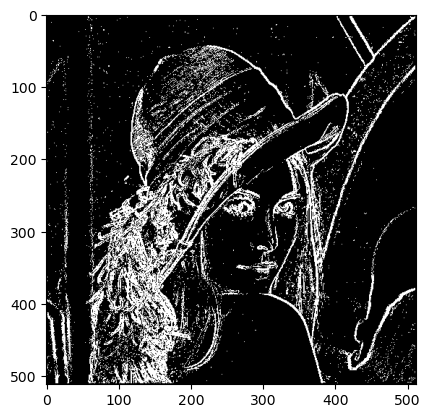

In [28]:
def contour(img, seuil):


    #dimensiosn de l'image
    y_dim, x_dim = np.shape(img)
    #initialiation de la matrice des valeurs des norme 2 du vecteur gradient
    G = np.zeros((y_dim, x_dim))

    #Calcul de la matrice de normes
    for i in range(y_dim-1):
        for j in range(x_dim-1):
            G[i,j] = (img[i+1,j]-img[i,j])**2 + (img[i,j+1]-img[i,j])**2
    
    # On prend le maximum parmis les normes
    G_max = np.amax(G)

    # On fixe le seuil à partir de l'input de la fonction
    v_seuil = seuil * G_max

    #On crée une matrice avec les 
    contour = np.zeros((y_dim, x_dim))
    for i in range(y_dim-1):
        for j in range(x_dim-1):
            if G[i,j] > v_seuil:
                contour[i,j] = 255
    plt.imshow(contour, cmap = 'gray')
    return contour

contour(to_grey(image_lena), seuil=0.01)

On peux aussi prendre une version appelé le masque de sobel, qui nous permet d'avoir une meilleure précision que l'algorithme précédent


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

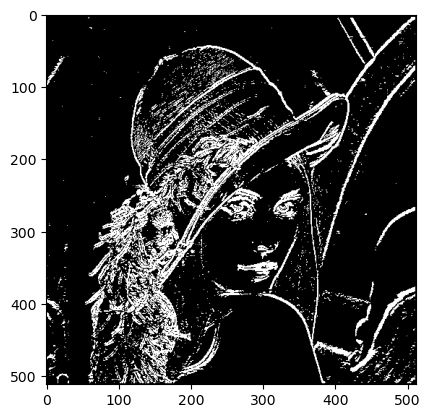

In [33]:
def contour_sobel(img, seuil):
    y_dim, x_dim = np.shape(img)
    G = np.zeros((y_dim, x_dim))
    for i in range(1,y_dim-1):
        for j in range(1,x_dim-1):
            S1 = -img[i-1, j+1] + img[i+1,j+1] + 2*(img[i+1,j]-img[i-1,j]) + img[i-1,j+1]-img[i-1,j-1]
            S2 = img[i-1,j-1]-img[i+1,j-1] + 2*(img[i-1,j]-img[i+1,j]) +img[i-1,j+1]-img[i+1,j+1]
            G[i,j] = S1**2 + S2**2
    G_max = np.amax(G)
    v_seuil = seuil * G_max
    contour = np.zeros((y_dim, x_dim))

    for i in range(1,y_dim-1):
        for j in range(1,x_dim-1):
            if G[i,j] > v_seuil:
                contour[i,j] = 255
    plt.imshow(contour, cmap = 'gray')
    return contour

contour_sobel(to_grey(image_lena),0.005)

Autres transformations

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


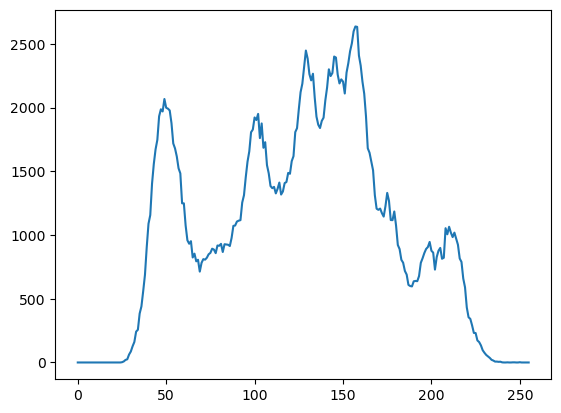

In [63]:
def histo_img(img):

    plotlist = np.zeros((256))
    
    for i in img:
        for j in i:
            
            plotlist[int(j)] = plotlist[int(j)]+ 1
            
    return plotlist
        
plt.plot(histo_img(to_grey(image_lena)))

In [ ]:
def more_conrast()